# TUTORIAL

## Creating a Python Package
https://packaging.python.org/en/latest/guides/section-build-and-publish/

### Convert to script

Lets first turn out notebook into a script

![image.png](images/convert_to_script.png)

**Demo output of executable script**

After some cleanup we'll name our script calculator.py and it will have the three functions we used in this notebook <br>
![image.png](images/calculator_py.png)

### Create unit test

Lets also add some unit test. The benefit of testing is that it serves as a form of documentation, it makes future refactors a lot easier since we'll see if we broke something immediately and it confirms that our code works in the manner we believe it should work.  We should aim to test edge cases and conditional paths of the code <br>
We'll put our tests in a folder called tests and name it test_{module we're testing}.py <br> 
**Bring up the test_calculator.py and run them for demo** 

### Convert script to package

Next we'll want to turn our script into a package, by creating a pyproject-toml <br>
https://packaging.python.org/en/latest/guides/writing-pyproject-toml/

My pyproject.toml for this project <br>
![image.png](images/pyprojecttoml_1.png)

Now with the pyproject.toml, we have the ability to install our package 
using the command . pyproject.toml is the specified file format of PEP 518 which contains the build system requirements of Python projects. https://peps.python.org/pep-0518/ 
```
pip install .
```

## Building and Publishing the package

1. install twine 
```
python3 -m pip install twine
```

2. install build
```
python3 -m pip install build
```
3. Then run 
```
python3 -m build --sdist
```

4. Lets publish our package to testpypi to make sure it works as intended, if it works as intended then we will publish it to pypi  https://packaging.python.org/en/latest/guides/using-testpypi/ , which requires creating an account on https://test.pypi.org 

5. After creating an account you need to create an api token to upload https://test.pypi.org/manage/account/ <br>
![image.png](images/add_api_token.png)

6. Using this token
To use this API token:

    Set your username to __token__
    Set your password to the token value, including the pypi- prefix

For example, if you are using Twine to upload your projects to PyPI, set up your $HOME/.pypirc file like this.We'll either edit the existing file or create a new file: 
```
vim $HOME/.pypirc 
```
Now add this to the .pypirc file <br>
```
[testpypi] <br>
username = __token__
password = pypi- 
```

7. Upload it with command 
```
twine upload --repository testpypi dist/*
```

8. Now we can view that our package exist on test.pypi <br> 
https://test.pypi.org/project/cafe-data-calculator/0.0.1/ 

9. We can now install our package in fresh environments and use these functions by
```
pip install -i https://test.pypi.org/simple/ cafe-data-calculator==0.0.1
```

## Editing an existing package

If we need to make changes to the package, we need to republish the package
1. Make your changes, then make sure to bump the version in the pyproject.yml in our case from 0.0.1 to 0.0.2 <br>
![image.png](images/pyprojecttoml_2.png) <br>
2. Then build <br> 
```
python3 -m build --sdist
```
3. Upload <br>
```
twine upload --repository testpypi dist/*
```
4. Now we have a new version https://test.pypi.org/project/cafe-data-calculator/0.0.2/ <br>

## Publishing to pypi

1. Similar to testpypi, we'll need to create an account on https://pypi.org/
2. then create an api key https://pypi.org/manage/account/ 
3. add it to pypirc <br>

```
vim $HOME/.pypirc 
```
then 

```
[pypi]
username = __token__
password = pypi-
```

4. Then build <br> 
```
python3 -m build
```

5. Then upload <br>
```
twine upload dist/*
```
For more details:
https://realpython.com/pypi-publish-python-package/#upload-your-package

6. We can now see our package is uploaded https://pypi.org/project/cafe-data-calculator/0.0.2/ 

## Deployment

Now lets deploy our app to https://mybinder.org/ <br>

"mybinder.org is an online service for building and sharing reproducible and interactive computational environments from online repositories. Under the hood, it is a federation of BinderHub deployments that are maintained by the Binder community. It serves as both a public service and a demonstration of the BinderHub technology, though it is by no means the only BinderHub in existence. If you’re interested in deploying your own BinderHub for your own uses, please see the BinderHub documentation and don’t hesitate to reach out to the Binder community."
https://mybinder.readthedocs.io/en/latest/introduction.html#introduction 


We can deploy the notebook and we can deploy the panel app

Deploying the notebook clean_calculator.ipynb <br>
![image.png](images/binder.png) <br>

It can take a while to load

Afterwards we can share the link or add nice banner to our Readme

https://mybinder.org/v2/gh/EduardoLZevallos/cafe_data_calculator.git/main?labpath=clean_calculator.ipynb <br>
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/EduardoLZevallos/cafe_data_calculator.git/main?labpath=clean_calculator.ipynb)

Create the panel app version https://panel.holoviz.org/how_to/deployment/binder.html 
1. Add an environment.yml which declares a conda environment with the dependencies required to run the app (refer to the conda documentation to see how to declare your dependencies). Add jupyter_panel_proxy as a dependency by adding either conda-forge or pyviz to the channel list:
2.  For this repo our environment.yml will look like this <br>
![image.png](images/environmentyml.png) <br>
3. We can then take our original binder link minus labpath https://mybinder.org/v2/gh/EduardoLZevallos/cafe_data_calculator.git/main and then append ?urlpath=/panel/{name of our app notebook}, <br> 
so in this case  https://mybinder.org/v2/gh/EduardoLZevallos/cafe_data_calculator.git/main?urlpath=/panel/clean_calculator

https://mybinder.org/v2/gh/EduardoLZevallos/cafe_data_calculator.git/main?urlpath=/panel/clean_calculator <br>
[![app](https://img.shields.io/badge/launch-binder%20app-579ACA.svg?logo=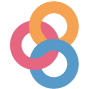)](https://mybinder.org/v2/gh/EduardoLZevallos/cafe_data_calculator.git/main?urlpath=/panel/clean_calculator) 

if your notebook app doesn't have servable you will get an error <br>
![image.png](images/servableExample.png) <br>

Servable https://panel.holoviz.org/getting_started/core_concepts.html <br>
Whenever you mark an object as .servable you are inserting it into a template. By default Panel uses a completely blank template, but it is very simple to select another template by setting pn.config.template. Here you will have a few options based on different frameworks, including 'bootstrap', 'material' and 'fast'. In the notebook the .servable() method is effectively a no-op. This means you can add it the components you want to add to the rendered app but also see it rendered inline. This makes it possible to build components sequentially in a notebook while simultaneously building an application to be served. If you want to mark something servable but do not want it rendered inline, just put a semicolon (‘;’) after it to tell Jupyter not to render it even if it is the last item in the cell.

Try to get it work as an app 
https://discourse.holoviz.org/t/how-do-i-serve-my-panel-apps-on-binder/1946 
https://panel.holoviz.org/how_to/deployment/binder.html
this person's example 
https://github.com/MarcSkovMadsen/load-forecasts/blob/main/app_code.py 
https://hub.ovh2.mybinder.org/user/marcskovmadsen-load-forecasts-vbv4k5ly/panel/app?token=GtAhdHgsRIm82nl_voawrQ